# Link Dataset

Dikarenakan ukuran dataset yang terlalu besar(42MB), maka untuk dataset saya upload di gdrive, berikut link Gdrive dataset:

[Belgium Population Classification](https://drive.google.com/file/d/1WGAMXm3Pkl7sp2xvdJQPbsOa4Z-MpESc/view?usp=sharing)

# Pendekatan Machine Learning

## Import Library yang diperlukan

menggunakan library yang diperlukan pada pengimplementasian metode-metode yang digunakan

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

Mengurangi jumlah dataset dikarenakan jumlah data yang berlebih

In [132]:
df = pd.read_csv("BELGIUM_POPULATION_STRUCTURE_2018.csv")
df.drop(df.index[6001:462417], inplace=True)

## Supervised Learning

### Support Vector Classifier (SVM)

digunakan pada label kategorikal

Mengambil 2 fitur untuk Binary Classification

In [133]:
X = df[['POPULATION', 'AGE']]
y = df['NATIONALITY']

Memetakan kelas target ke label biner

In [134]:
y = np.where(y == 'Belgian', 1, -1)

Membagi data (split) ke train set dan test set

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Membuat objek classifier SVM

In [136]:
svm = SVC(kernel="rbf")

Melatih classifier dengan data train

In [137]:
svm.fit(X_train, y_train)

SVC()

Melakukan prediksi data test dengan model

In [138]:
y_pred = svm.predict(X_test)

Menyimpan nilai support vectors dan indeksnya

In [139]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

Plotting menggunakan scatter dari Seaborn dan menampilkan titik titik support vector, lalu membuat garis decision boundary, meshgrid untuk evaluasi model, grafik decision boundary dan garis margin serta menambahkan label dan legenda

c:\Users\ikhwa\venv_B1-21\Ikhwan_066\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


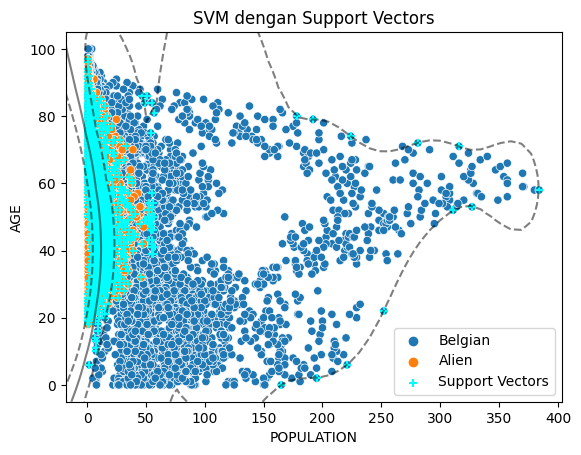

In [140]:
sns.scatterplot(x='POPULATION', y='AGE', hue='NATIONALITY', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('POPULATION')
plt.ylabel('AGE')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()

Melihat 4 nilai metriks dengan menggunakan library dari Scikit-Learn yaitu Classification Report.

In [141]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.69      0.63      0.66       884
           1       0.83      0.86      0.84      1817

    accuracy                           0.79      2701
   macro avg       0.76      0.75      0.75      2701
weighted avg       0.78      0.79      0.78      2701



### Linear Regression

Memisahkan fitur dan target dari dataset 

In [142]:
X, y = df[['AGE']], df['POPULATION']

Membagi data fitur dan target menjadi data training

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test

In [144]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

Visualisasi hasil prediksi regresi linear pada data test yang membandingkan prediksi (garis biru) dengan data asli (titik hitam) untuk melihat sejauh mana model cocok dengan data aktual

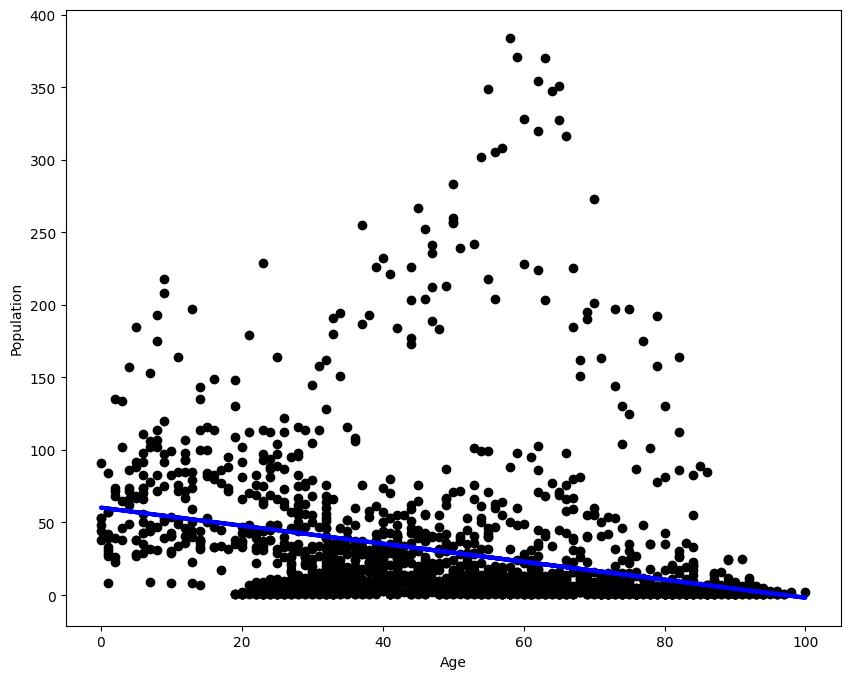

In [145]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("Age")
plt.ylabel("Population")
plt.show()

Membuat objek classifier SVM

In [146]:
svm = SVC(kernel="linear")

Melatih classifier dengan data train

In [147]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

melakukan prediksi data test dengan model dan menampilkan hasil

In [148]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 27.813436979455858
MSE : 3316.9117157134924
RMSE : 57.59263595038425
R-Squared : -0.25298265642132334


## Unsupervised Learning

### K-Means

Menggunakan fitur X dan menentukan banyaknya kelompok

In [149]:
X = df[["AGE", "POPULATION"]]
K = 2

Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [150]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

In [151]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

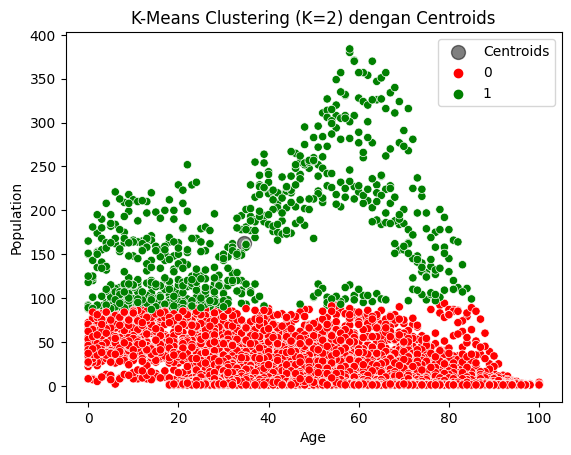

In [152]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="AGE", y="POPULATION", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Age")
plt.ylabel("Population")
plt.legend()
plt.show()

Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [153]:
cross_tab = pd.crosstab(df["cluster"], df["NATIONALITY"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
NATIONALITY  Alien  Belgian
cluster                    
0             3001     5289
1                0      712 



Menghitung dan mencetak nilai "Adjusted Rand Index (ARI)" yang mengukur sejauh mana clustering dengan algoritma K-Means

In [154]:
ari = adjusted_rand_score(df["NATIONALITY"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): -0.05


Menghitung dan mencetak nilai "Normalized Mutual Information (NMI)" untuk mengevaluasi sejauh mana hasil clustering dengan algoritma K-Means

In [155]:
true_labels_num = df["NATIONALITY"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.07


Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [156]:
homogeneity = homogeneity_score(df["NATIONALITY"], cluster_labels)
completeness = completeness_score(df["NATIONALITY"], cluster_labels)
v_measure = v_measure_score(df["NATIONALITY"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.05
Completeness Score: 0.12
V-Measure Score: 0.07
